# K-means clustering with Scikit.Learn (iris(붓꽃) Dataset)

## Algorithm explanation.

1. setting the initial point(k). / k는 중심점 및 cluster 수
2. cluster 부여 / k개의 중심점과 개별 데이터 간의 거리 측정, 가장 가까운 중심점으로 데이터 부여
3. centroid update / 할당된 데이터들의 평균값으로 새로운 centroid를 update
4. optimization / 2,3번 반복했을 때 변화 없으면 작업 중단

    다음의 목적함수를 최소화하는 것을 목표로 하는 알고리즘
\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

### Step 1. 기본 라이브러리 불러오기 

In [1]:
import pandas as pd # 데이터 포인트 제작 담당
import numpy as np # 연산 처리 담당
import sklearn as sk # 머신러닝 라이브러리, 시각화 담당
import matplotlib.pyplot as plt # 데이터 시각화 담당 
import seaborn as sns # 각 정보들끼리의 상관관계 담당
%matplotlib inline 
# 그림, 도표로 보여주는 기능 담당
from sklearn.cluster import KMeans
# 전처리 기능 담당
from sklearn import preprocessing
# 군집 평가 - 실루엣 분석
from sklearn.metrics import silhouette_score
# 위젯을 인터렉티브하게 만드는 담당
from ipywidgets import interact

### Step 2. iris Dataset 로딩 :

In [2]:
#[Step 1] 데이터 준비
# Scikit.Learn 라이브러리에 있는 iris 데이터를 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
iris
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
#iris.values()
len(iris.data)

150

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# iris dataset에서 feature 해당하는 데이터
print(iris.feature_names)      # feature 데이터에 대한 설명(이름)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# iris dataset에서 label 해당하는 데이터
y_origin = iris.target # y_origin : iris 데이터 원본
print(iris.target)
print(iris.target_names)       # label 데이터에 대한 설명(이름)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


### Step 3. iris Dataset 전처리 :

In [7]:
# iris dataset 가독성을 위한 DataFrame 작업 :
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# iris dataset 중, feature에 대한 target 정보 연결
df_iris['target'] = pd.Series(iris.target)
df_iris['target_names'] = pd.Series(iris.target_names)
species = []
for i in range(len(df_iris)):
    if df_iris.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df_iris.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df_iris.iloc[i]['target'] == 2:
        species.append('virginica')
df_iris['Species'] = species
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [8]:
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Step 4. 시각화

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

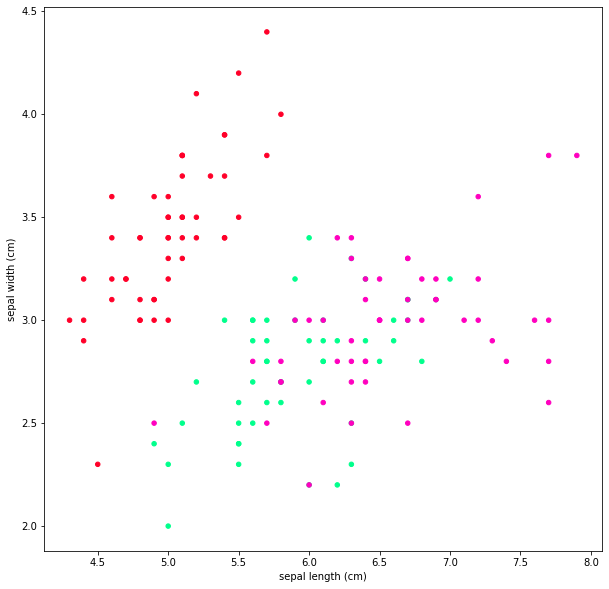

In [9]:
# Original DataFrame을 그래프로 표현 - 시각화
# iris.feature_names 중 'sepal length(cm)'와 'sepal width(cm)'을 x축, y축으로 설정
df_iris.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap='gist_rainbow', 
        colorbar=False, figsize=(10, 10))

### (참고) DataFrame에서 iris.feature_names간 관계

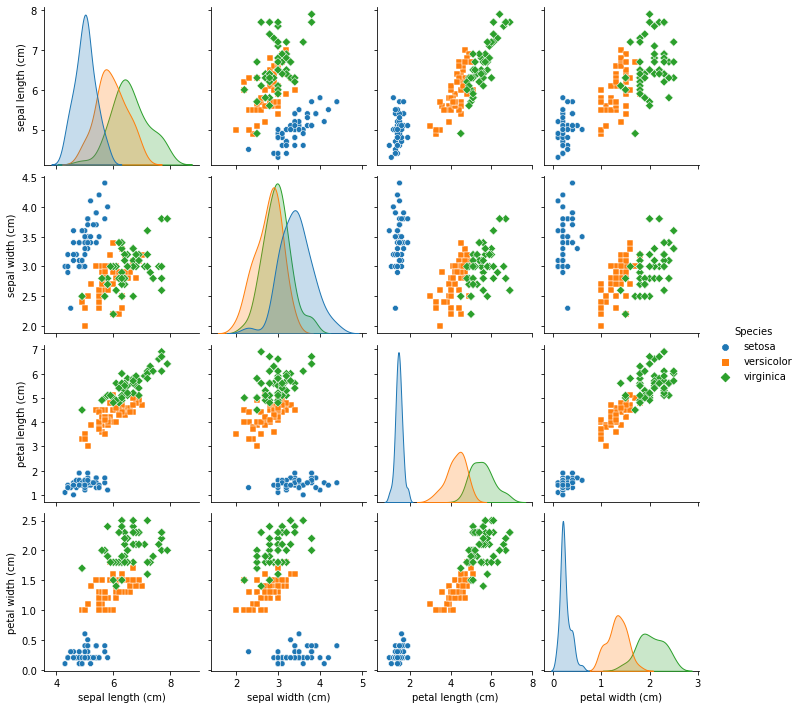

In [10]:
# Iris Pair Plot, Hue로 꽃의 종을 시각화
sns.pairplot(df_iris.drop(['target'],axis=1), hue = 'Species', height = 2.5, markers = ["8", "s", "D"])

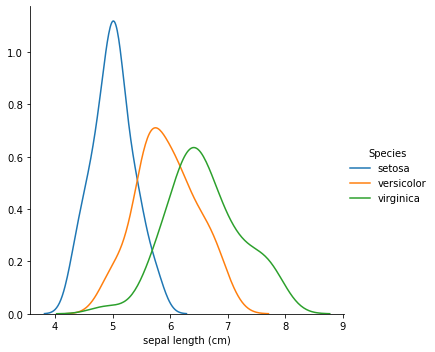

In [11]:
# Iris 꽃의 종마다 FacetGrid으로 sepal length 시각화
sns.FacetGrid(df_iris, hue = 'Species', height = 5).map(sns.kdeplot, 'sepal length (cm)').add_legend()

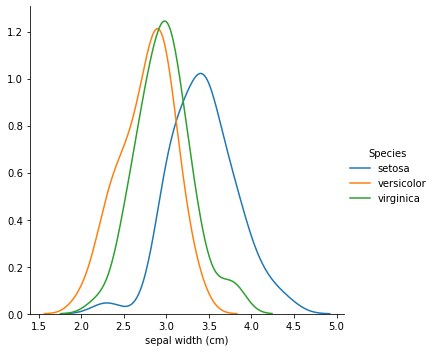

In [12]:
# Iris 꽃의 종마다 FacetGrid으로 sepal width 시각화
sns.FacetGrid(df_iris, hue = 'Species', height = 5).map(sns.kdeplot, 'sepal width (cm)').add_legend()

<AxesSubplot:xlabel='Species', ylabel='sepal length (cm)'>

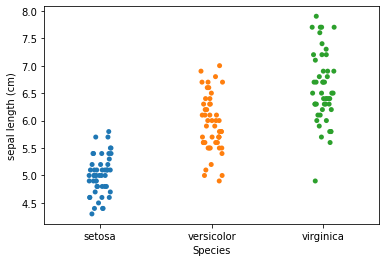

In [13]:
# Iris 꽃의 종마다 stripplot으로 sepal length 시각화
sns.stripplot(x='Species', y='sepal length (cm)', data = df_iris, jitter = True, edgecolor = 'gray', size = 5)

<AxesSubplot:xlabel='Species', ylabel='sepal width (cm)'>

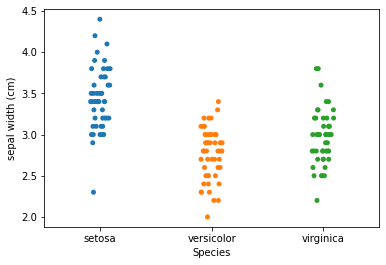

In [14]:
# Iris 꽃의 종마다 stripplot으로 sepal width 시각화
sns.stripplot(x='Species', y='sepal width (cm)', data = df_iris, jitter = True, edgecolor = 'gray', size = 5)

### Step 5. Find the optimum k using Elbow-Method

C:\ProgramData\seo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\seo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


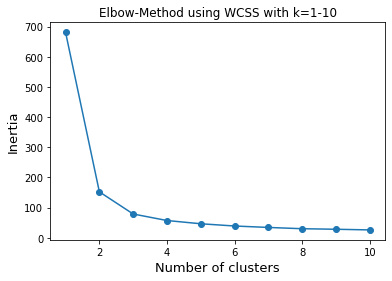

In [15]:
# 최적의 cluster 값 탐색
inertia_arr = []
k_range = range(1, 11)

# k = 1~10까지 반복하면서 inertia를 확실하게 줄여주는 구간을 찾기
for i in k_range:
    kmeans11 = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0).fit(x)
    kmeans11.fit(x)
    inertia = kmeans11.inertia_
    inertia_arr.append(inertia)

# Elobw Method 그래프 그리기
plt.plot(k_range, inertia_arr, marker= 'o')
plt.title('Elbow-Method using WCSS with k=1-10') # WCSS : 클러스터 내 제곱합
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

In [16]:
# As you can see, the optimal value of k is 3,
# as the elbow-Like shape is formed at k = 3 in the above graph.

### Step 6. instantiate and fit our K-means cluster model.

In [17]:
# 최적의 클러스터 개수 : 3
# 10개의 랜덤 상태를 사용
kmeans3 = KMeans(n_clusters = 3, random_state = 10)
y_pred = kmeans3.fit_predict(x)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [18]:
kmeans3.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

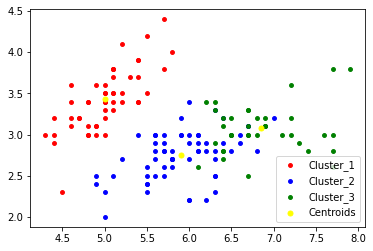

In [19]:
# 중심값 표시
# legend(범례) : 각 계열의 이름을 표시하기 위해 차트의 한 공간에 표시된 차트의 요소
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s = 15, c='red', label = 'Cluster_1')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], s = 15, c='blue', label = 'Cluster_2')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], s = 15, c='green', label = 'Cluster_3')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c ='yellow', label = 'Centroids')
plt.legend()
plt.show()

### Step 7. original vs clustered results

Text(0.5, 1.0, 'Predicted')

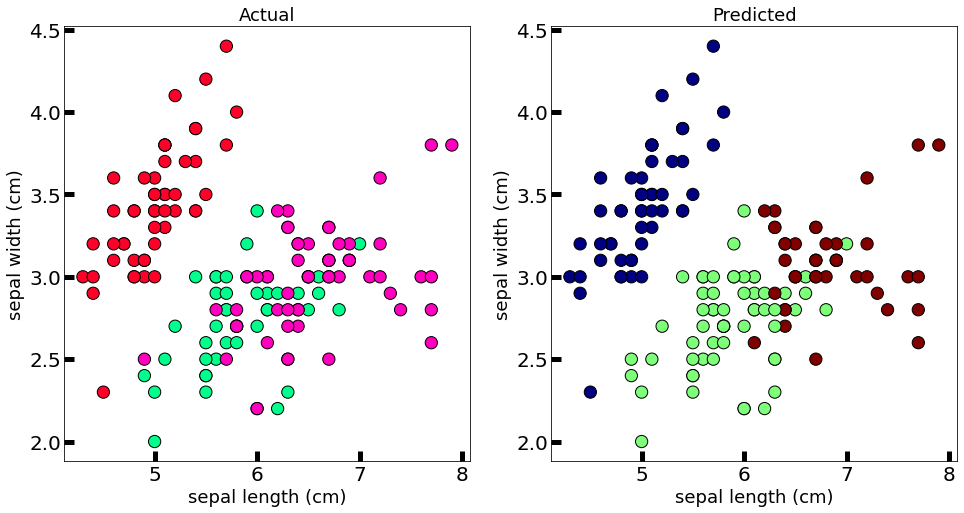

In [20]:
# 비교 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize = (16,8))

# Iris 꽃잎 그래프
axes[0].scatter(x[:, 0], x[:, 1], c = y_origin, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[0].set_xlabel('sepal length (cm)', fontsize = 18)
axes[0].set_ylabel('sepal width (cm)', fontsize = 18)
axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual', fontsize = 18)

# K-Means Clustering을 통해 예측한 결과 그래프
axes[1].scatter(x[:, 0], x[:, 1], c = y_pred, cmap = 'jet', edgecolor = 'k', s = 150)
axes[1].set_xlabel('sepal length (cm)', fontsize = 18)
axes[1].set_ylabel('sepal width (cm)', fontsize = 18)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].set_title('Predicted', fontsize = 18)

### Step 8. evaluation

In [21]:
# IRIS 꽃 데이터를 읽고 순서를 섞는다
iris_df = sns.load_dataset('iris').sample(frac=1).reset_index(drop=True)

# x컬럼들과 Y컬럼을 지정한다
x_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_column  = 'species'

# Y컬럼의 문자열값을 LabelEncoder를 통해 숫자로 바꾼다.
y_true_label_encoder = preprocessing.LabelEncoder()
y_true_encoded       = y_true_label_encoder.fit_transform(iris_df[y_column])

kMeansModels              = dict() # k값별 모델 저장할 딕셔너리
kMeansModelPreds          = dict() # k값별 모델 예측 결과 저장할 딕셔너리
kMeansModelLabelEncoder   = dict() # k값별 라벨인코더 저장할 딕셔너리

sumSquaredDistancesList   = list() # 샘플과 클러스터 센터간 거리 제곱의 합 리스트
silhouetteScoreList       = list() # Silhouette Coefficient 평균 리스트

k_list = [2,3,4,5,6,7,8,9] # k값으로 2부터 9까지 테스트한다
for k in k_list: # k값 순회
    model = KMeans(n_clusters=k, random_state=0, n_init=100)  # k개 클러스터로 모델 생성
    cluster_labels = model.fit_predict(iris_df[x_columns]) # X컬럼으로 지정된 필드값으로 피팅
    
    y_pred_label_encoder = preprocessing.LabelEncoder() # 예측한 클러스터에서 사용할 라벨인코더
    # 초기 임의 값 (unknown 1, unknown 2...) 으로 인코딩한다
    y_pred_label_encoder.fit(np.array(['unknown ' + str(i+1) for i in range(0, k, 1)], dtype=object))
    for pred_label_num in range(0,k,1): # 각 클러스터 순회        
        # 해당 클러스터에서 가장 많이 출력한 실제 값의 인덱스를 구한다
        most_frequent_index = np.argmax(np.bincount(y_true_encoded[cluster_labels==pred_label_num]))
        # 구한 인덱스의 라벨을 구해서 해당클러스터 라벨로 업데이트한다
        y_pred_label_encoder.classes_[pred_label_num] = y_true_label_encoder.classes_[most_frequent_index]
    
    kMeansModels[k]     = model                       # 모델 저장
    kMeansModelPreds[k] = cluster_labels              # 모델 예측결과 저장     
    kMeansModelLabelEncoder[k] = y_pred_label_encoder # 라벨인코더 저장
    sumSquaredDistancesList.append(model.inertia_)    # # 샘플과 클러스터 센터간 거리 제곱의 합 저장
    silhouetteScoreList.append(silhouette_score(iris_df[x_columns].values, cluster_labels)) # Silhouette Score저장
    

In [22]:
def render_plot(x_col='sepal_length', y_col='sepal_width', k=3):
    y_pred        = kMeansModelPreds[k]        # 모델 예측값
    label_encoder = kMeansModelLabelEncoder[k] # 라벨인코더
    
    # 원본과 예측값을 합쳐 데이터셋을 준비
    mdf = pd.concat([iris_df, pd.DataFrame(label_encoder.inverse_transform(y_pred), columns=[y_column+'_pred'])], axis=1)
    
    plt.figure(figsize=(15,8)) # 출력 크기를 지정
    
    ddf = mdf[mdf[y_column] != mdf[y_column+'_pred']] # 실제라벨과 예측라벨이 틀린 경우 추출
    # X기호로 error임을 표시한다
    plt.scatter(x=ddf[x_col], y=ddf[y_col], c='black', marker='x', s=300, label='error') 
    
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black'] # 컬러값 리스트
    for (idx,cls) in enumerate(list(y_true_label_encoder.classes_)):
        ddf = mdf[mdf[y_column] == cls] # 실제라벨 데이터는 작은 점으로 출력
        plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='.', linewidths=3, s=50, label=cls)
        ddf = mdf[mdf[y_column+'_pred'] == cls] # 예측라벨 데이터는 큰 원으로 출력
        plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='o', linewidths=13, s=2, label=cls+' pred')
    
    plt.legend();plt.xlabel(x_col);plt.ylabel(y_col)
    print('accuracy {:.2f}'.format(np.mean(mdf[y_column] == mdf[y_column+'_pred']))) # 정확도 출력
    plt.show()
	
interact(render_plot, x_col=x_columns, y_col=x_columns, k=k_list)

interactive(children=(Dropdown(description='x_col', options=('sepal_length', 'sepal_width', 'petal_length', 'p…

<function __main__.render_plot(x_col='sepal_length', y_col='sepal_width', k=3)>

In [153]:
# sepal length 와 sepal width 사이의 상관관계 분석 결과
# k = 2 / accuracy : 0.67
# k = 3 / accuracy : 0.89
# k = 4 / accuracy : 0.88
# k = 5 / accuracy : 0.91
# k = 6 / accuracy : 0.91
# k = 7 / accuracy : 0.97
# k = 8 / accuracy : 0.97
# k = 9 / accuracy : 0.97

# 최적의 클러스터 k = 3